## Лабораторная работа №3.4 Деревья решений

### Задача классификации

Генерируем данные для задачи классификации

Text(0, 0.5, 'X2')

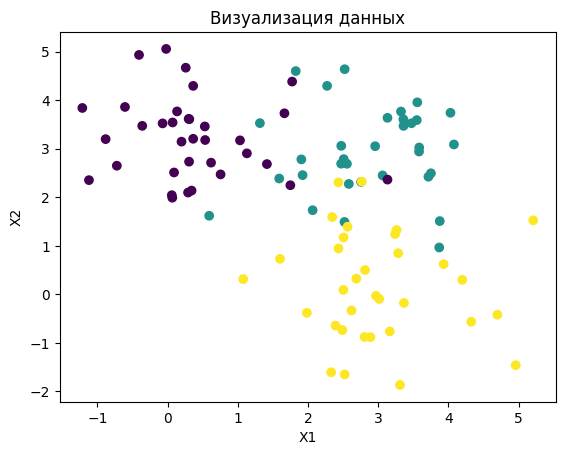

In [ ]:
import random

import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

RANDOM_SEED = random.seed()

X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)],
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
depth=4
clf_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                  random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Выведем получившееся дерево решений

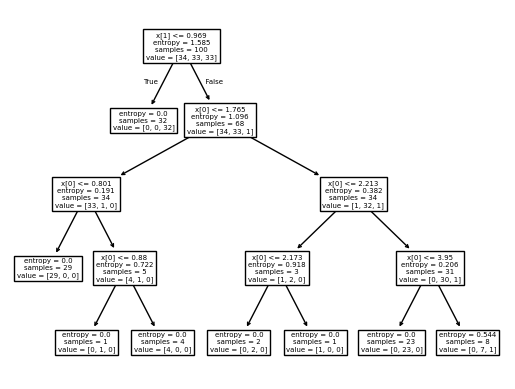

In [ ]:
tree.plot_tree(clf_tree)
plt.show()

Выведем визуализацию дерева в текстовом виде

In [ ]:
tree_str = tree.export_text(clf_tree)
print(tree_str)

|--- feature_1 <= 0.97
|   |--- class: 2
|--- feature_1 >  0.97
|   |--- feature_0 <= 1.76
|   |   |--- feature_0 <= 0.80
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.80
|   |   |   |--- feature_0 <= 0.88
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.88
|   |   |   |   |--- class: 0
|   |--- feature_0 >  1.76
|   |   |--- feature_0 <= 2.21
|   |   |   |--- feature_0 <= 2.17
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  2.17
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  2.21
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  3.95
|   |   |   |   |--- class: 1



По полученным результатам мы можем увидеть, как дерево принимало решение о принадлежности точки к одному из классов

Визуализируем границы принятия решений

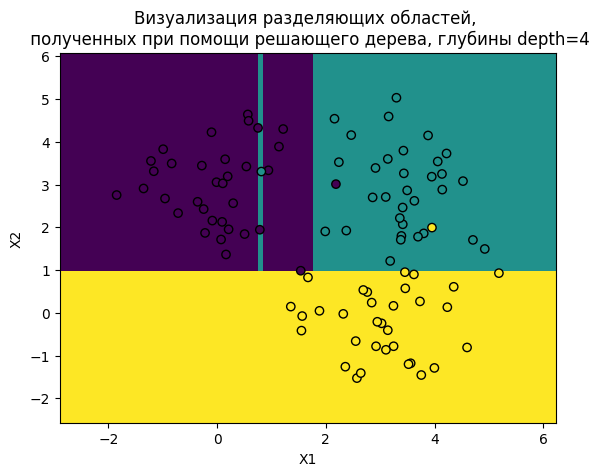

In [ ]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  1 32]]
Accuracy = 0.99
F1_score = 0.99


В данном случае модель имеет точно 0.99, что считается очень хорошим результатом. Повысить его можно через увеличение глубины дерева.

Создадим новое наблюдение

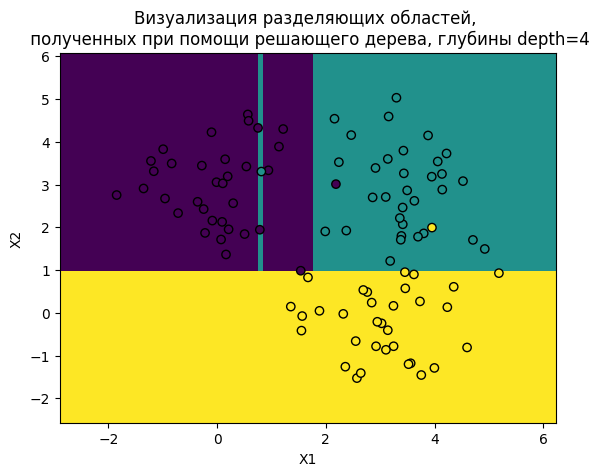

In [ ]:
observation_new = [[2, 1]]
clf_tree.predict(observation_new)

X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

plt.title('Визуализация разделяющих областей, \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Задача регрессии

Сгенерируем датасет

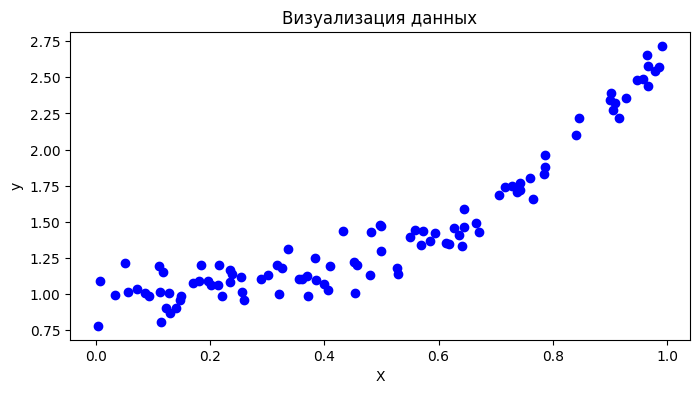

In [ ]:
n_samples = 100
X = np.sort(np.random.rand(n_samples))
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue')
plt.title("Визуализация данных")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
depth=3
reg_tree = tree.DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_SEED)
reg_tree.fit(X.reshape(-1, 1), y)

DecisionTreeRegressor(max_depth=3)

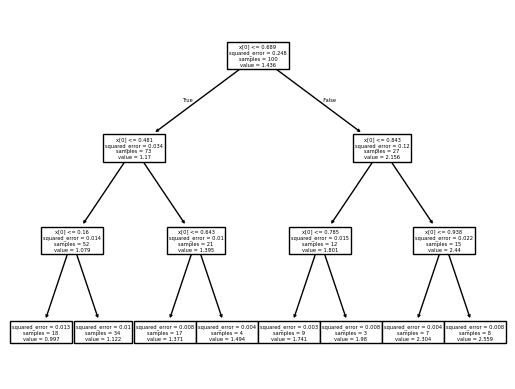

In [ ]:
tree.plot_tree(reg_tree)
plt.show()

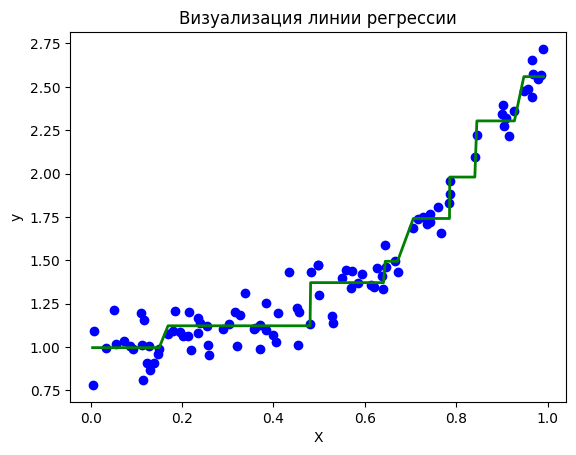

In [ ]:
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y')

In [ ]:
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

r2=  0.9654615552036481
MSE=  0.00857949597787424


Модель предсказывает с большим процентом точности

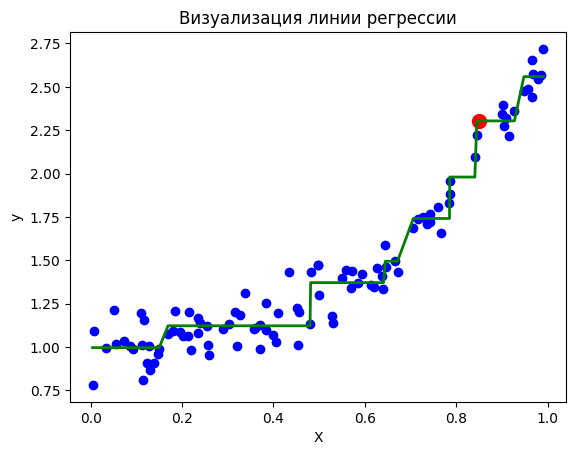

In [ ]:
observation_new = [[0.85]]

y_new_pred = reg_tree.predict(observation_new)
plt.plot(X, y_pred_reg, "g", lw=2)

plt.scatter(X, y, color='blue')
plt.scatter(observation_new, y_new_pred, c="r", s=100, label="Новое предсказание")
plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

Двигая точку мы можем увидеть, что на небольшом отклонении положения точки результат предсказания не меняется

## Задания для самостоятельного выполнения

Загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = df[['petal length (cm)', 'petal width (cm)']]
df['target'] = iris.target
print(df)
print(df)

     petal length (cm)  petal width (cm)  target
0                  1.4               0.2       0
1                  1.4               0.2       0
2                  1.3               0.2       0
3                  1.5               0.2       0
4                  1.4               0.2       0
..                 ...               ...     ...
145                5.2               2.3       2
146                5.0               1.9       2
147                5.2               2.0       2
148                5.4               2.3       2
149                5.1               1.8       2

[150 rows x 3 columns]
     petal length (cm)  petal width (cm)  target
0                  1.4               0.2       0
1                  1.4               0.2       0
2                  1.3               0.2       0
3                  1.5               0.2       0
4                  1.4               0.2       0
..                 ...               ...     ...
145                5.2               2.3     

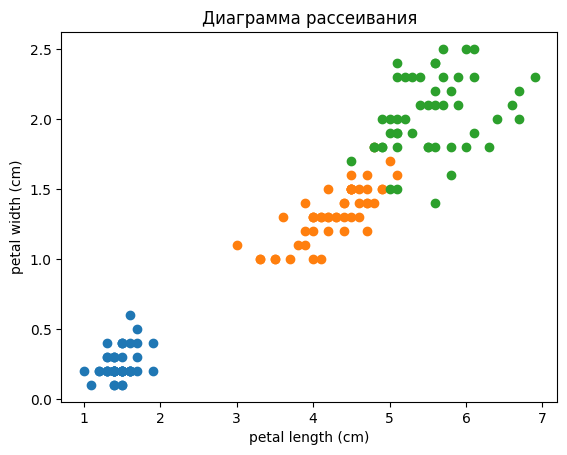

In [ ]:
for label in df['target'].unique():
    subset = df[df['target'] == label]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                label=iris.target_names[label])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Диаграмма рассеивания')
plt.show()

In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

depth=4
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(max_depth=4)

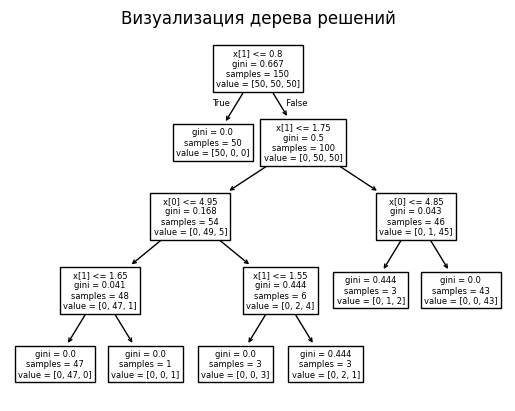

In [ ]:
tree.plot_tree(clf_tree)
plt.title("Визуализация дерева решений")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


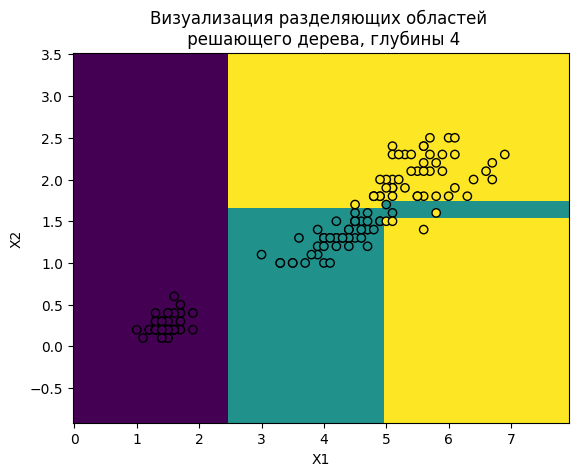

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Accuracy = 0.9866666666666667
F1_score = 0.9866666666666667


In [ ]:
X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

# Визуализация
plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis', shading='auto')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
Accuracy = 0.9866666666666667
F1_score = 0.9866666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


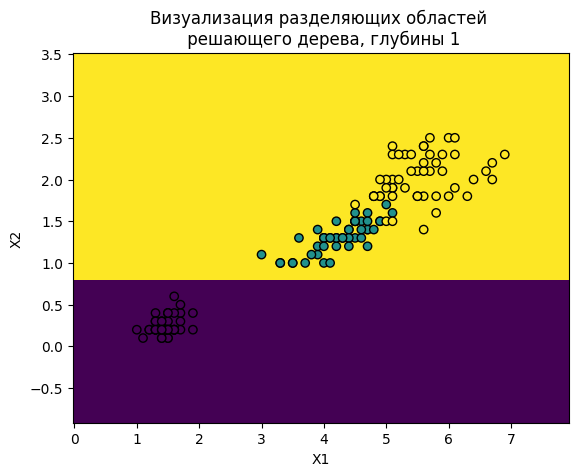

[[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]
Accuracy = 0.6666666666666666
F1_score = 0.6666666666666666


In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

depth=1
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis', shading='auto')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


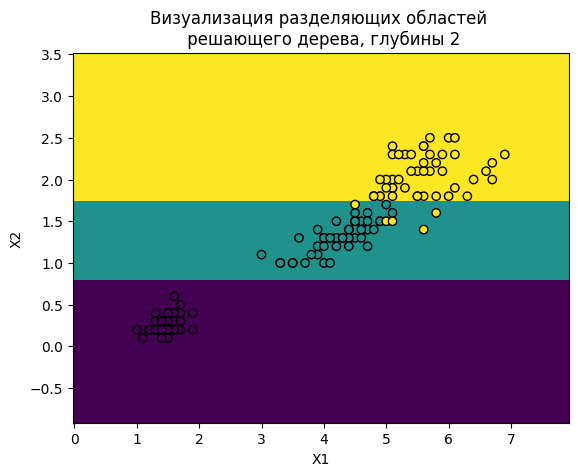

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]
Accuracy = 0.96
F1_score = 0.96


In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

depth=2
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis', shading='auto')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


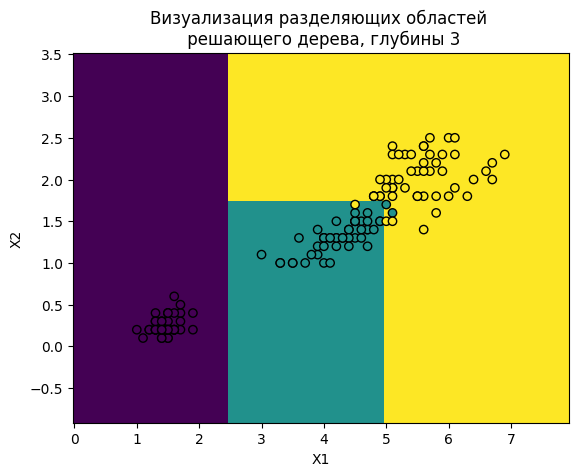

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
Accuracy = 0.9733333333333334
F1_score = 0.9733333333333334


In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

depth=3
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis', shading='auto')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


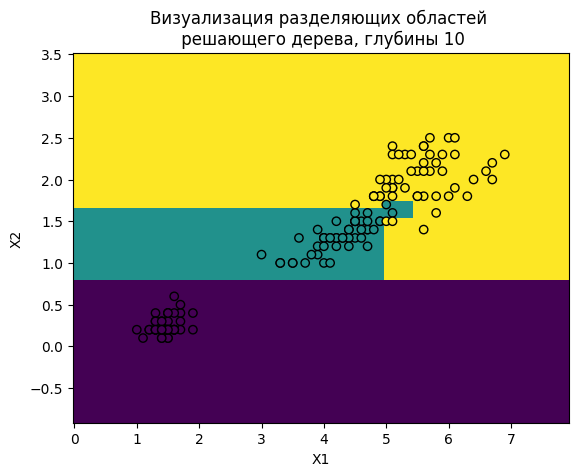

[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


In [ ]:
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

depth=10
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)

plt.pcolormesh(X0_grid, X1_grid, y_predict, cmap='viridis', shading='auto')

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title('Визуализация разделяющих областей \n решающего дерева, глубины {}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

Выводы:
Лучше всего определяет модель с глубиной принятия решений 10 (99.33%), но достаточная точность (95%) достигается уже при глубине 3

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

depth=4
clf_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_SEED)
clf_tree.fit(X, y)

DecisionTreeClassifier(max_depth=4)

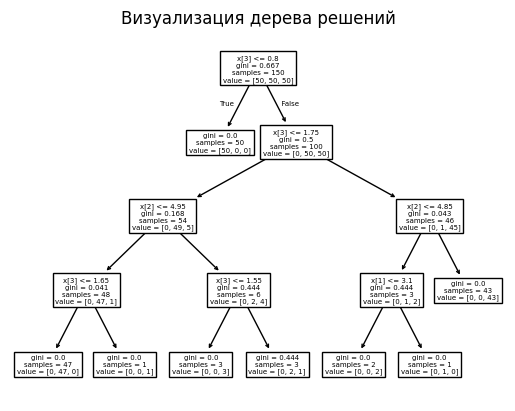

[[50  0  0]
 [ 0 50  0]
 [ 0  1 49]]
Accuracy = 0.9933333333333333
F1_score = 0.9933333333333333


In [ ]:
tree.plot_tree(clf_tree)
plt.title("Визуализация дерева решений")
plt.show()

# Метрики
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

Модель показывает более высокие метрики при работе с 4-мя признаками, чем с двумя

In [ ]:
dataset = fetch_california_housing()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
print(df)
df = df[['AveBedrms']]
df['target'] = dataset.target
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

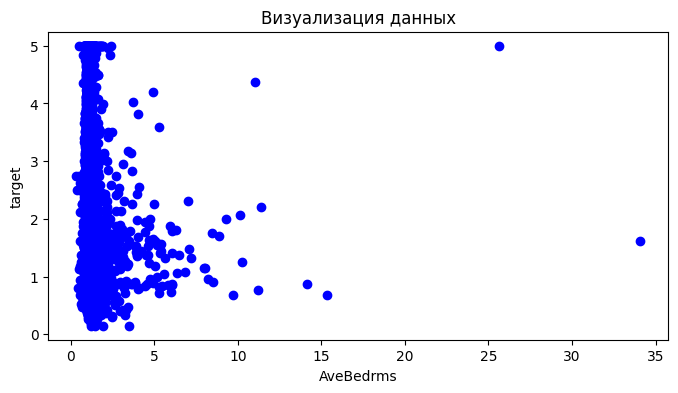

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue')
plt.title("Визуализация данных")
plt.xlabel("AveBedrms")
plt.ylabel("target")
plt.show()

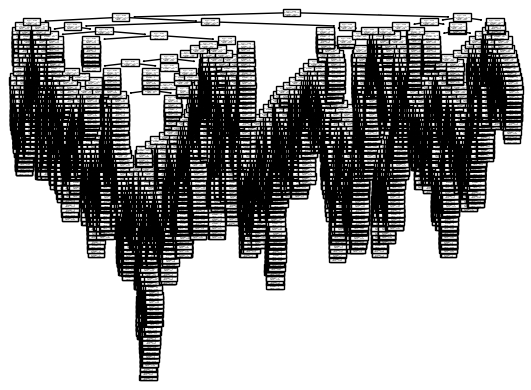

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


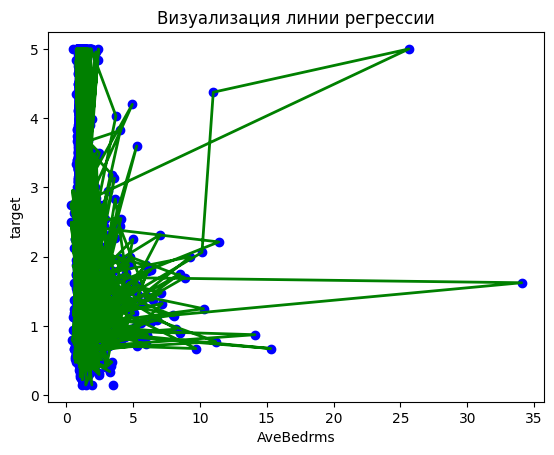

r2=  0.679172913720798
MSE=  0.4271974030094434


In [ ]:
reg_tree = tree.DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

# Визуализация графа
tree.plot_tree(reg_tree)
plt.show()

# Визуализация линии регресии
plt.scatter(X, y, c="b")

y_pred_reg = reg_tree.predict(X.values.reshape(-1, 1))
plt.plot(X, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('AveBedrms')
plt.ylabel('target')
plt.show()

print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -12

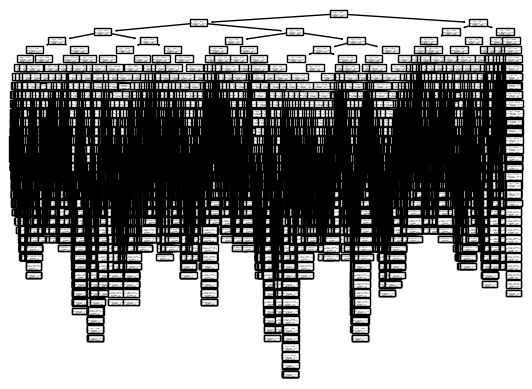

r2=  1.0
MSE=  9.528247270910767e-32


In [8]:
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df)

X = df.drop('target', axis=1)
y = df['target']

reg_tree = tree.DecisionTreeRegressor(random_state=0)
reg_tree.fit(X, y)

# Визуализация графа
tree.plot_tree(reg_tree)
plt.show()

y_pred_reg = reg_tree.predict(X)
print('r2= ', r2_score(y, y_pred_reg))
print('MSE= ', mean_squared_error(y, y_pred_reg))

## Контрольные вопросы:

1. **Почему граница принятия решений у деревьев решений имеет такую характерную форму?**
Потому что на каждом шаге алгоритм выбирает пороговое разделение по одному признаку. Эти разбиения соответствуют гиперплоскостям, параллельным осям признаков, что и приводит к “рваным” или ступенчатым границам в двумерном пространстве.

2. **Как глубина дерева влияет на сложность модели?**
Позволяет более точно охарактеризовывать данные и выполнять предсказание, но это может вызвать проблему, тк может произойти переобучение и модель будет подстраиваться и под шумы в данных.

3. **Почему глубина дерева на разных ветках может быть разная?**
Потому что группы могут быть однородно и разнородны, для первых требуется небольшая вложенность, чтобы однозначно определяться, для других надо большую вложенность.

4. **Почему глубина дерева на разных ветках может быть разная?**
Критерий в деревьях решений – это функция, используемая для оценки качества каждого разбиения. Выбор критерия определяет, какие разбиения будут считаться “хорошими”, и, соответственно, влияет на структуру дерева и качество итоговой модели.